## Sentiment Analysis of Twitter Account
- Gather Twitter Data
- Clean the data
- Sentiment Tracking
- Analysis

### Import Dependencies

In [141]:
import tweepy # library for accessing the Twitter API
from textblob import TextBlob # library for processing textual data
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS

### Twitter API Credentials

In [142]:
APIkey= "ENTER FROM TWITTER'S DEVELOPER ACCOUNT" #aka consumerkey
APISecretKey= "ENTER FROM TWITTER'S DEVELOPER ACCOUNT"
accessToken= "ENTER FROM TWITTER'S DEVELOPER ACCOUNT"
accessTokenSecret= "ENTER FROM TWITTER'S DEVELOPER ACCOUNT"

### Create the authentication object

In [143]:
authenticate = tweepy.OAuthHandler(APIkey, APISecretKey)
authenticate.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(authenticate)

In [144]:
# screen name = username of twitter account
user_id = 'elonmusk'
posts = api.user_timeline(screen_name=user_id, count=100, lang='en', tweet_mode='extended')
# posts

In [145]:
# the above cell will print in raw format so to make it into a readable form
# use tweet.full_text
i = 1 
for tweet in posts[:5]: # fetch first 5 tweets from posts
    print(str(i) + ')' + tweet.full_text + '\n')
    i += 1

1)@RationalEtienne @SciGuySpace Potentially, 1000 times higher

2)@AlexSvanArt @Neopork85 Pretty close. No tiles on back side of flaps. Some tiles towards leeward side of ship trailing plasma spilling off rear of flaps.

3)@SciGuySpace Cumulative payload to orbit is the really crazy number. Falcon has delivered more than double rest of world combined over trailing 12 months.

4)RT @Tesla: Just surpassed 200k Powerwall installs globally 🔋🏡☀️

5)RT @Tesla: If you want to help cover Giga Berlin in awesome graffiti art, send us your work at GigaBerlinArt@Tesla.com



### Create a dataframe

In [146]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df

,Tweets
0,"@RationalEtienne @SciGuySpace Potentially, 100..."
1,@AlexSvanArt @Neopork85 Pretty close. No tiles...
2,@SciGuySpace Cumulative payload to orbit is th...
3,RT @Tesla: Just surpassed 200k Powerwall insta...
4,RT @Tesla: If you want to help cover Giga Berl...
5,@BTC_Archive 🤣🤣
6,RT @SpaceX: Today's flight will mark the 40th ...
7,RT @SpaceX: Watch Falcon 9 launch 60 Starlink ...
8,"If only they had spaceships, they’d still be a..."
9,Deep thots https://t.co/J5mJff7IIL


### Data Cleaning

In [147]:
# make a function to clean tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0-9]+', '', text) # removing mentions
    text = re.sub('#', '', text) # removing hashtags
    text = re.sub('RT[\s]+', '', text) # removing Retweets
    text = re.sub('https?:\/\/\S+', '', text) # removing links
    return text

In [148]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"Potentially, 1000 times higher"
1,Pretty close. No tiles on back side of flaps...
2,Cumulative payload to orbit is the really cra...
3,: Just surpassed 200k Powerwall installs globa...
4,: If you want to help cover Giga Berlin in awe...
5,_Archive 🤣🤣
6,: Today's flight will mark the 40th time Space...
7,: Watch Falcon 9 launch 60 Starlink satellites...
8,"If only they had spaceships, they’d still be a..."
9,Deep thots


### Sentiment Tracking  
- Polarity implies the sentiment, 
        * Positive > 0.0
        * Neutral = 0.0
        * Negative < 0.0
- Subjectivity, if higher generally refers to personal opinion, emotion or judgement and not a factual information

In [149]:
tweet1 = "Today was a good day"
analysis = TextBlob(tweet1)
analysis.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [150]:
tweet2 = "Today was a bad day"
analysis = TextBlob(tweet2)
analysis.sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [151]:
tweet3 = "Today was a worst day"
analysis = TextBlob(tweet3)
analysis.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [152]:
tweet4 = "Today was a best day"
analysis = TextBlob(tweet4)
analysis.sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [153]:
# create a function to get the subjectivity of all tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity of all tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [154]:
# create two columns 'Subectivity' and 'Polarity' and store it into DataFrame
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,"Potentially, 1000 times higher",0.750000,0.125000
1,Pretty close. No tiles on back side of flaps...,0.500000,0.125000
2,Cumulative payload to orbit is the really cra...,0.466667,-0.033333
3,: Just surpassed 200k Powerwall installs globa...,0.000000,0.000000
4,: If you want to help cover Giga Berlin in awe...,1.000000,1.000000
5,_Archive 🤣🤣,0.000000,0.000000
6,: Today's flight will mark the 40th time Space...,0.000000,0.000000
7,: Watch Falcon 9 launch 60 Starlink satellites...,0.000000,0.000000
8,"If only they had spaceships, they’d still be a...",1.000000,0.000000
9,Deep thots,0.400000,0.000000


#### Word Cloud Visualization

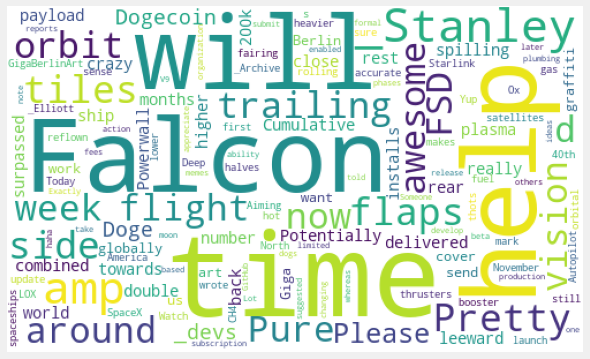

In [155]:
allwords = ' '.join([i for i in df['Tweets']])
stopwords = set(STOPWORDS)

Cloud = WordCloud(width=500, height=300, background_color ='white', random_state=0, stopwords = stopwords, max_font_size=100).generate(allwords)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.imshow(Cloud)
plt.show()

In [156]:
# create a function to compute the sentiment based on polarity score
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

# add it to the dataframe as a new column named Analysis
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Potentially, 1000 times higher",0.750000,0.125000,Positive
1,Pretty close. No tiles on back side of flaps...,0.500000,0.125000,Positive
2,Cumulative payload to orbit is the really cra...,0.466667,-0.033333,Negative
3,: Just surpassed 200k Powerwall installs globa...,0.000000,0.000000,Neutral
4,: If you want to help cover Giga Berlin in awe...,1.000000,1.000000,Positive
5,_Archive 🤣🤣,0.000000,0.000000,Neutral
6,: Today's flight will mark the 40th time Space...,0.000000,0.000000,Neutral
7,: Watch Falcon 9 launch 60 Starlink satellites...,0.000000,0.000000,Neutral
8,"If only they had spaceships, they’d still be a...",1.000000,0.000000,Neutral
9,Deep thots,0.400000,0.000000,Neutral


In [157]:
df['Analysis'].value_counts()

Neutral     12
Positive     9
Negative     1
Name: Analysis, dtype: int64

### Visualization

In [160]:
df.shape

(22, 4)

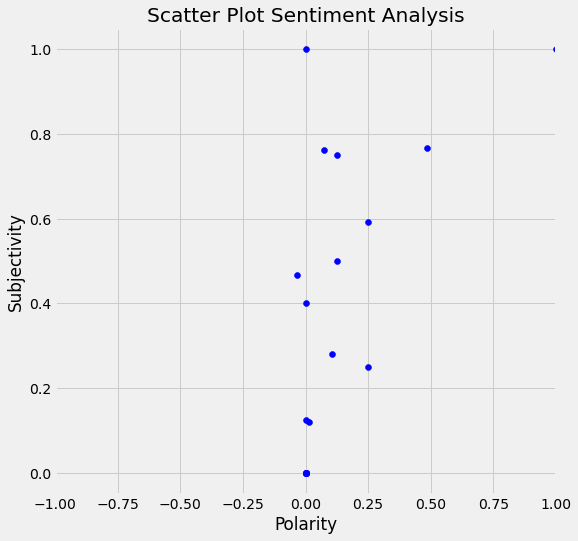

In [161]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title("Scatter Plot Sentiment Analysis")
plt.xlabel("Polarity")
plt.xlim(-1,1) # because polarity is on scale between -1 to 1
plt.ylabel("Subjectivity")
plt.show()

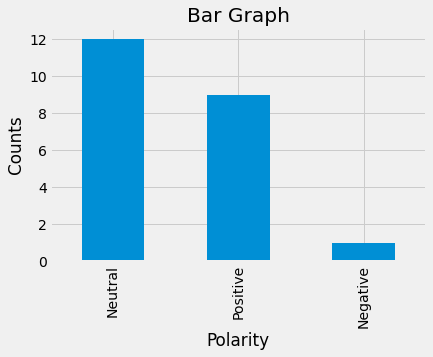

In [162]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Bar Graph")
plt.xlabel("Polarity")
plt.ylabel("Counts")
plt.show()

### Fetch data from DataFrame as per requirements

In [163]:
# get positive tweets only
i = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for j in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][j] == 'Positive'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i += 1

1)   Potentially, 1000 times higher

2)   Pretty close. No tiles on back side of flaps. Some tiles towards leeward side of ship trailing plasma spilling off rear of flaps.

3) : If you want to help cover Giga Berlin in awesome graffiti art, send us your work at GigaBerlinArt.com

4)  Not sure who wrote this, but it’s accurate 

5) _Elliott   Aiming to have hot gas thrusters on booster for first orbital flight

6)   Pure vision Autopilot is now rolling out in North America. There will be an update of this production release in 2 weeks, then FSD beta V9.0 (also pure vision) a week later. FSD subscription will be enabled around the same time.

7)   Exactly 🤣🤣

8)  Please note Dogecoin has no formal organization &amp; no one reports to me, so my ability to take action is limited

9) Someone suggested changing Dogecoin fees based on phases of the moon, which is pretty awesome haha



In [164]:
# get Negative tweets only
i = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for j in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][j] == 'Negative'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i += 1

1)  Cumulative payload to orbit is the really crazy number. Falcon has delivered more than double rest of world combined over trailing 12 months.



In [165]:
# get Neutral tweets only
i = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for j in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][j] == 'Neutral'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i += 1

1) : Just surpassed 200k Powerwall installs globally 🔋🏡☀️

2) _Archive 🤣🤣

3) : Today's flight will mark the 40th time SpaceX has reflown Falcon fairing halves since November 2019

4) : Watch Falcon 9 launch 60 Starlink satellites to orbit →   

5) If only they had spaceships, they’d still be around

6) Deep thots 

7) _Stanley    Yup

8)  _Stanley    They are now the same (LOX below CH4). Ox is 3.5 times heavier than fuel, so makes sense to have it lower.

9) _Stanley    Lot of plumbing!

10)  _devs Doge has dogs &amp; memes, whereas the others do not

11)  They told me they would appreciate help

12) If you’d like to help develop Doge, please submit ideas on GitHub &amp;  _devs



Credits: [Developer Ashish](https://www.youtube.com/watch?v=Wk59z-DiSqs&t=2371s)